# Objective

An automobile company has plans to enter new markets with their existing products (P1, P2, P3, P4 and P5). After intensive market research, they’ve deduced that the behavior of new market is similar to their existing market.

Content
In their existing market, the sales team has classified all customers into 4 segments (A, B, C, D ). Then, they performed segmented outreach and communication for different segment of customers. This strategy has work exceptionally well for them. They plan to use the same strategy on new markets and have identified 2627 new potential customers.

You are required to help the manager to predict the right group of the new customers.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
data=pd.read_csv('Train.csv')

#### As ID column is not useful in dividing customers into segment because ID is any random value thus have no correlations with the segmentation , we could drop ID column.

In [2]:
data.drop(['ID'],inplace=True,axis=1)
data.head()

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A


In [59]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           8068 non-null   int8   
 1   Ever_Married     8068 non-null   int8   
 2   Age              8068 non-null   int64  
 3   Graduated        8068 non-null   int8   
 4   Work_Experience  8068 non-null   float64
 5   Spending_Score   8068 non-null   int8   
 6   Family_Size      8068 non-null   float64
 7   Var_1            8068 non-null   int8   
 8   Artist           8068 non-null   uint8  
 9   Doctor           8068 non-null   uint8  
 10  Engineer         8068 non-null   uint8  
 11  Entertainment    8068 non-null   uint8  
 12  Executive        8068 non-null   uint8  
 13  Healthcare       8068 non-null   uint8  
 14  Homemaker        8068 non-null   uint8  
 15  Lawyer           8068 non-null   uint8  
 16  Marketing        8068 non-null   uint8  
dtypes: float64(2),

Numbers of non-null instances of each attributes

In [3]:
data.count()

Gender             8068
Ever_Married       7928
Age                8068
Graduated          7990
Profession         7944
Work_Experience    7239
Spending_Score     8068
Family_Size        7733
Var_1              7992
Segmentation       8068
dtype: int64

In [4]:
data.Segmentation.value_counts()

D    2268
A    1972
C    1970
B    1858
Name: Segmentation, dtype: int64

Converting labels to categorical

In [5]:
label=pd.Categorical(data.Segmentation,categories=['A','B','C','D']).codes
data.drop(['Segmentation'],axis=1,inplace=True)
label

array([3, 0, 1, ..., 3, 1, 1], dtype=int8)

Train Test split of data and label

## Gender 

### Analysing and finding relations of the segmentation with gender.

In [6]:
data.Gender.isnull().sum()

0

In [7]:
data.Gender.value_counts()

Male      4417
Female    3651
Name: Gender, dtype: int64

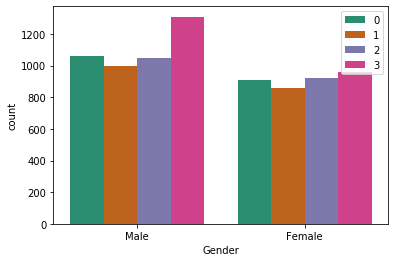

In [8]:
sns.countplot(data.Gender,hue=label,palette='Dark2')
plt.show()

As there is no null value in the gender column we could easily assign
male as 0 and
female as 1

In [9]:
data.Gender=pd.Categorical(data.Gender,categories=['Male','Female'],ordered=True).codes

## Marital status

In [10]:
data.Ever_Married.isnull().sum()

140

There are 140 unknown values so we could assign them to most common marital status

In [11]:
data.Ever_Married.value_counts()

Yes    4643
No     3285
Name: Ever_Married, dtype: int64

As most of the people are married filling the empty space with 'yes'

In [12]:
data['Ever_Married'].fillna('Yes',inplace=True)

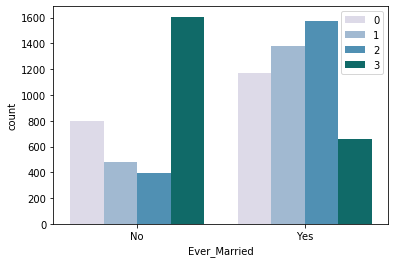

In [13]:
sns.countplot(data.Ever_Married,hue=label,palette='PuBuGn')

In [14]:
data.Ever_Married=pd.Categorical(data.Ever_Married,categories=['No','Yes'],ordered=True).codes

## Graduated

In [15]:
data.Graduated.isnull().sum()

78

78 values in Graduated columns are empty so we would again apply same stategy and the maximum occuring value of the column would be set at the empty space 

In [16]:
data.Graduated.value_counts()

Yes    4968
No     3022
Name: Graduated, dtype: int64

In [17]:
data.Graduated.fillna('Yes',inplace=True)

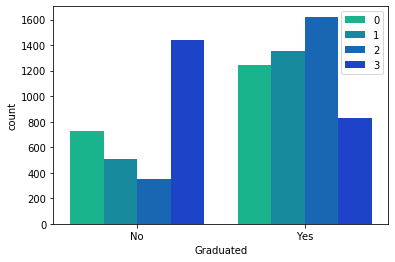

In [18]:
sns.countplot(data.Graduated,hue=label,palette='winter_r')

The above graph gives information that non graduated customers are  categorised as category D , in the mean time the graduated customers are categorised as category C most likely.

In [19]:
data.Graduated=pd.Categorical(data.Graduated,categories=['No','Yes'],ordered=True).codes

##  Profession

In [20]:
data.Profession.isnull().sum()

124

In [21]:
data.Profession.value_counts()

Artist           2516
Healthcare       1332
Entertainment     949
Engineer          699
Doctor            688
Lawyer            623
Executive         599
Marketing         292
Homemaker         246
Name: Profession, dtype: int64

The above table specifies that customers are mainly artist and healthcare

In [22]:
data.Profession.fillna('Artist',inplace=True)

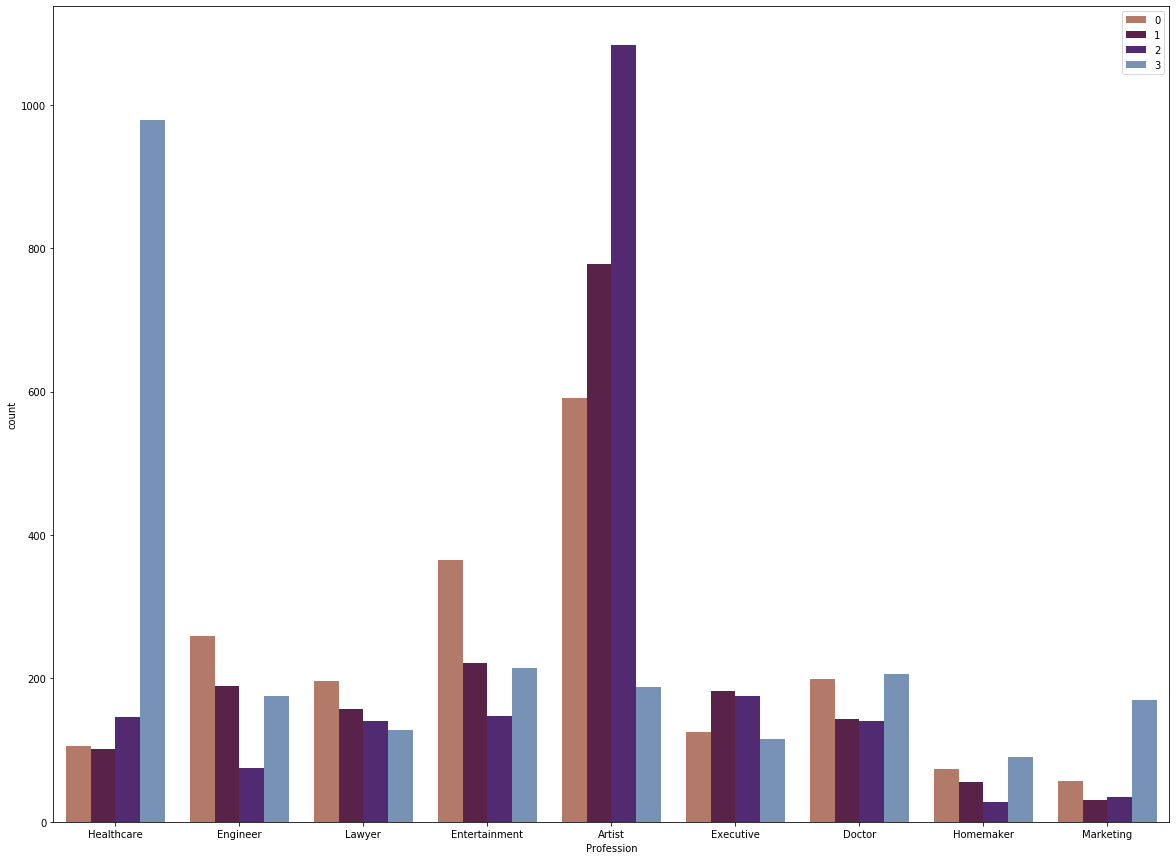

In [23]:
plt.figure(figsize=(20,15))
sns.countplot(data.Profession,hue=label,palette='twilight_r')

The above graph signifies that Artist and Executive are generally categorised as category C and Healthcare worker and other are generally  categorised as category D.

In [24]:
profession=pd.get_dummies(data.Profession)
data.drop(['Profession'],axis=1,inplace=True)

In [25]:
profession

,Artist,Doctor,Engineer,Entertainment,Executive,Healthcare,Homemaker,Lawyer,Marketing
0,0,0,0,0,0,1,0,0,0
1,0,0,1,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0
3,0,0,0,0,0,0,0,1,0
4,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
8063,1,0,0,0,0,0,0,0,0
8064,0,0,0,0,1,0,0,0,0
8065,0,0,0,0,0,1,0,0,0
8066,0,0,0,0,0,1,0,0,0


In [26]:
data=data.join(profession)

In [27]:
data

,Gender,Ever_Married,Age,Graduated,Work_Experience,Spending_Score,Family_Size,Var_1,Artist,Doctor,Engineer,Entertainment,Executive,Healthcare,Homemaker,Lawyer,Marketing
0,0,0,22,0,1.0,Low,4.0,Cat_4,0,0,0,0,0,1,0,0,0
1,1,1,38,1,NaN,Average,3.0,Cat_4,0,0,1,0,0,0,0,0,0
2,1,1,67,1,1.0,Low,1.0,Cat_6,0,0,1,0,0,0,0,0,0
3,0,1,67,1,0.0,High,2.0,Cat_6,0,0,0,0,0,0,0,1,0
4,1,1,40,1,NaN,High,6.0,Cat_6,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8063,0,0,22,0,0.0,Low,7.0,Cat_1,1,0,0,0,0,0,0,0,0
8064,0,0,35,0,3.0,Low,4.0,Cat_4,0,0,0,0,1,0,0,0,0
8065,1,0,33,1,1.0,Low,1.0,Cat_6,0,0,0,0,0,1,0,0,0
8066,1,0,27,1,1.0,Low,4.0,Cat_6,0,0,0,0,0,1,0,0,0


## spending score 

In [28]:
data.Spending_Score.isnull().sum()

0

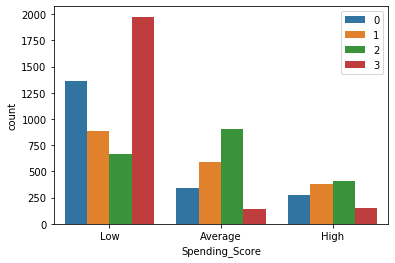

In [29]:
sns.countplot(data.Spending_Score,hue=label)

The above graph informs about that low budget people are mostly been classified in category D

In [30]:
data.Spending_Score=pd.Categorical(data.Spending_Score,categories=['Low','Average','High'],ordered=True).codes

## var_1

In [31]:
data.Var_1.isnull().sum()

76

In [32]:
data.Var_1.value_counts()

Cat_6    5238
Cat_4    1089
Cat_3     822
Cat_2     422
Cat_7     203
Cat_1     133
Cat_5      85
Name: Var_1, dtype: int64

In [33]:
data.Var_1.fillna('Cat_6',inplace=True)

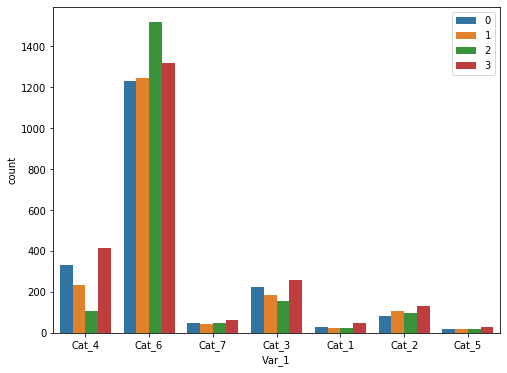

In [34]:
plt.figure(figsize=(8,6))
sns.countplot(data.Var_1,hue=label)

In [35]:
data.Var_1=pd.Categorical(data.Var_1).codes

## working experience

In [36]:
data.Work_Experience.isnull().sum()

829

In [37]:
data.Work_Experience.value_counts()

1.0     2354
0.0     2318
9.0      474
8.0      463
2.0      286
3.0      255
4.0      253
6.0      204
7.0      196
5.0      194
10.0      53
11.0      50
12.0      48
13.0      46
14.0      45
Name: Work_Experience, dtype: int64

The missing value of work_experience customer, can be treated as zero experience

In [38]:
data.Work_Experience.fillna(0,inplace=True)

(array([5501.,  286.,  508.,  194.,  204.,  659.,  474.,  103.,   48.,
          91.]),
 array([ 0. ,  1.4,  2.8,  4.2,  5.6,  7. ,  8.4,  9.8, 11.2, 12.6, 14. ]),
 <a list of 10 Patch objects>)

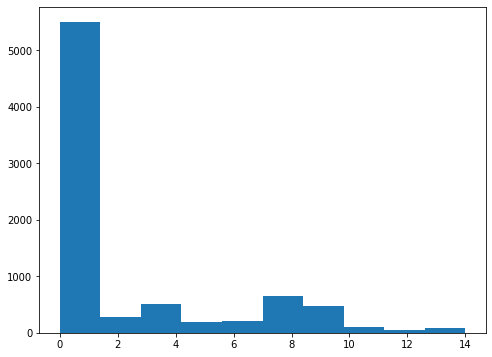

In [39]:
plt.figure(figsize=(8,6))
plt.hist(data.Work_Experience)

## Family size 

In [40]:
data.Family_Size.isnull().sum()

335

In [41]:
data.Family_Size.value_counts()

2.0    2390
3.0    1497
1.0    1453
4.0    1379
5.0     612
6.0     212
7.0      96
8.0      50
9.0      44
Name: Family_Size, dtype: int64

Filling the column with the previous appeared value

In [42]:
data.Family_Size.fillna(method='ffill',inplace=True)

(array([1526., 2487., 1564., 1436.,    0.,  639.,  218.,  102.,   50.,
          46.]),
 array([1. , 1.8, 2.6, 3.4, 4.2, 5. , 5.8, 6.6, 7.4, 8.2, 9. ]),
 <a list of 10 Patch objects>)

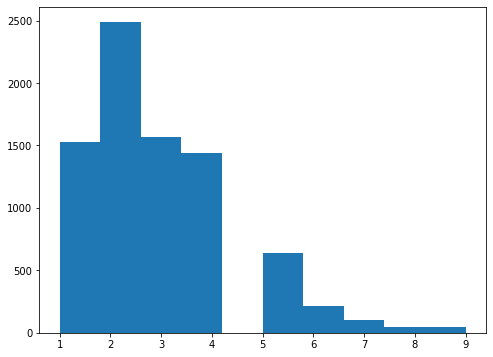

In [43]:
plt.figure(figsize=(8,6))
plt.hist(data.Family_Size)

## Age 

In [44]:
data.Age.isnull().sum()

0

In [45]:
print("the max age of the customer is {0} \n the minimum age of the customer is {1}".format(max(data.Age),min(data.Age)))

the max age of the customer is 89 
 the minimum age of the customer is 18


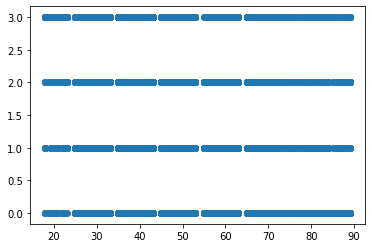

In [46]:
plt.scatter(data.Age,label)

(array([ 998., 1463., 1354., 1211., 1132.,  573.,  457.,  407.,  218.,
         255.]),
 array([18. , 25.1, 32.2, 39.3, 46.4, 53.5, 60.6, 67.7, 74.8, 81.9, 89. ]),
 <a list of 10 Patch objects>)

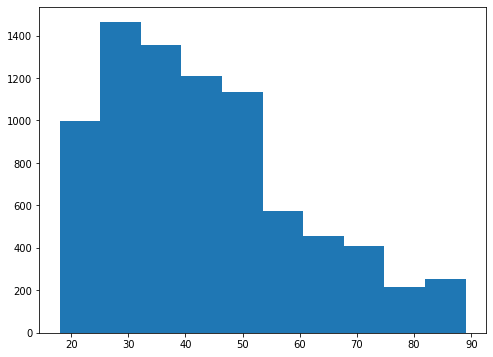

In [47]:
plt.figure(figsize=(8,6))
plt.hist(data.Age)

In the above graphs of Age,work experience and family size are screwed.
so we could use MinMaxScaler to normalize  group of data between the range of 0 to 1.

In [48]:
# data=pd.DataFrame([data],columns=data.columns)
data.head()

,Gender,Ever_Married,Age,Graduated,Work_Experience,Spending_Score,Family_Size,Var_1,Artist,Doctor,Engineer,Entertainment,Executive,Healthcare,Homemaker,Lawyer,Marketing
0,0,0,22,0,1.0,0,4.0,3,0,0,0,0,0,1,0,0,0
1,1,1,38,1,0.0,1,3.0,3,0,0,1,0,0,0,0,0,0
2,1,1,67,1,1.0,0,1.0,5,0,0,1,0,0,0,0,0,0
3,0,1,67,1,0.0,2,2.0,5,0,0,0,0,0,0,0,1,0
4,1,1,40,1,0.0,2,6.0,5,0,0,0,1,0,0,0,0,0


In [49]:
# from sklearn.preprocessing import MinMaxScaler
# scaler=MinMaxScaler()
# screw_data=MinMaxScaler(data['Age','Work_Experience','Family_Size'])


In [50]:
correlation_data=pd.DataFrame(label,columns=['label'])
correlation_data=correlation_data.join(data)
correlation_data

,label,Gender,Ever_Married,Age,Graduated,Work_Experience,Spending_Score,Family_Size,Var_1,Artist,Doctor,Engineer,Entertainment,Executive,Healthcare,Homemaker,Lawyer,Marketing
0,3,0,0,22,0,1.0,0,4.0,3,0,0,0,0,0,1,0,0,0
1,0,1,1,38,1,0.0,1,3.0,3,0,0,1,0,0,0,0,0,0
2,1,1,1,67,1,1.0,0,1.0,5,0,0,1,0,0,0,0,0,0
3,1,0,1,67,1,0.0,2,2.0,5,0,0,0,0,0,0,0,1,0
4,0,1,1,40,1,0.0,2,6.0,5,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8063,3,0,0,22,0,0.0,0,7.0,0,1,0,0,0,0,0,0,0,0
8064,3,0,0,35,0,3.0,0,4.0,3,0,0,0,0,1,0,0,0,0
8065,3,1,0,33,1,1.0,0,1.0,5,0,0,0,0,0,1,0,0,0
8066,1,1,0,27,1,1.0,0,4.0,5,0,0,0,0,0,1,0,0,0


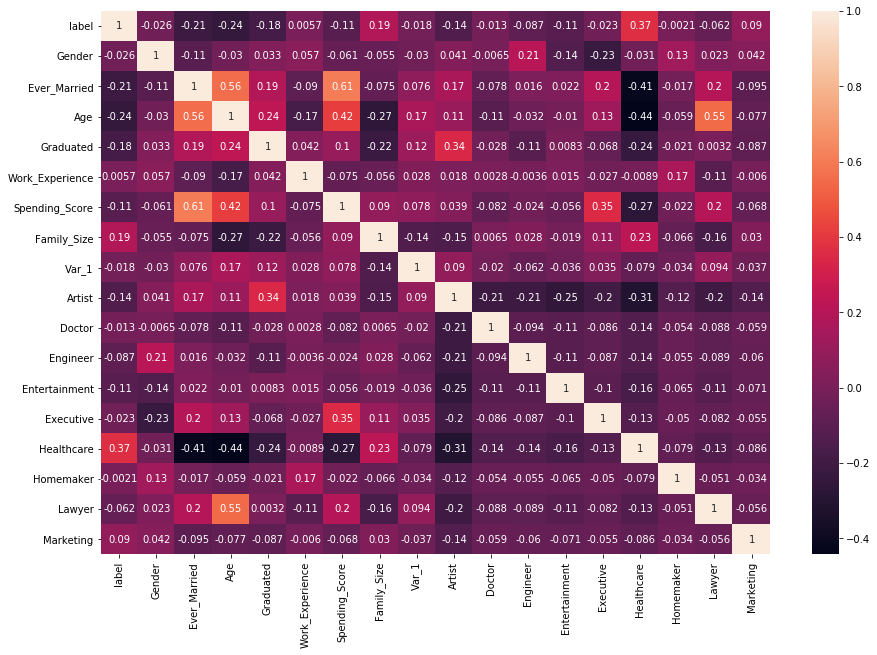

In [51]:
plt.figure(figsize=(15,10))
sns.heatmap(correlation_data.corr(),annot=True)

# Train-validation spliting of dataset

In [52]:
train_data,val_data,train_label,val_label=train_test_split(data,label,test_size=0.2,random_state=40)

## Model Selection 

We select DecisionTreeClassifer as the first classifier, with max_depth of 10 to avoid overfittig of data.

### DecisionTreeClassifier 

In [53]:
from sklearn.tree import DecisionTreeClassifier
classifier1=DecisionTreeClassifier(max_depth=10)
classifier1.fit(train_data,train_label)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [54]:
print("To evaluate the performace of train data on the model \n",classification_report(train_label,classifier1.predict(train_data)))
print("To evaluate the performace of validatation data on the model \n",classification_report(val_label,classifier1.predict(val_data)))

To evaluate the performace of train data on the model 
               precision    recall  f1-score   support

           0       0.54      0.69      0.61      1579
           1       0.59      0.47      0.52      1479
           2       0.67      0.62      0.65      1571
           3       0.75      0.74      0.75      1825

    accuracy                           0.64      6454
   macro avg       0.64      0.63      0.63      6454
weighted avg       0.64      0.64      0.64      6454

To evaluate the performace of validatation data on the model 
               precision    recall  f1-score   support

           0       0.37      0.49      0.43       393
           1       0.38      0.30      0.34       379
           2       0.54      0.49      0.51       399
           3       0.66      0.65      0.65       443

    accuracy                           0.49      1614
   macro avg       0.49      0.48      0.48      1614
weighted avg       0.50      0.49      0.49      1614



Though the overall accuracy of the classifier don't seems great but works pleasant well in identifing the category 'D' customer with accuracy of about 65%.The main reason here is lack of availability of data as category 'D' have quit larger data as compared with others thus have a little more accuracy.

### RandomForestClassifier 

In [55]:
from sklearn.ensemble import RandomForestClassifier
classifier2=RandomForestClassifier(max_depth=10)
classifier2.fit(train_data,train_label)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [56]:
print("To evaluate the performace of train data on the model \n",classification_report(train_label,classifier2.predict(train_data)))
print("To evaluate the performace of validation data on the model \n",classification_report(val_label,classifier2.predict(val_data)))

To evaluate the performace of train data on the model 
               precision    recall  f1-score   support

           0       0.65      0.66      0.66      1579
           1       0.63      0.52      0.57      1479
           2       0.67      0.69      0.68      1571
           3       0.75      0.83      0.79      1825

    accuracy                           0.69      6454
   macro avg       0.68      0.68      0.68      6454
weighted avg       0.68      0.69      0.68      6454

To evaluate the performace of validation data on the model 
               precision    recall  f1-score   support

           0       0.44      0.46      0.45       393
           1       0.43      0.37      0.40       379
           2       0.59      0.56      0.57       399
           3       0.65      0.73      0.69       443

    accuracy                           0.54      1614
   macro avg       0.53      0.53      0.53      1614
weighted avg       0.53      0.54      0.53      1614



RandomForestClassifier is better classifier model here as it gives a quit better accuracy in classifying each categories.

### LogisticRegression

In [57]:
from sklearn.linear_model import LogisticRegression
classifier3=LogisticRegression(tol=0.01,max_iter=1000)
classifier3.fit(train_data,train_label)

C:\Users\abhij\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.01, verbose=0,
                   warm_start=False)

In [58]:
print("To evaluate the performace of train data on the model \n",classification_report(train_label,classifier3.predict(train_data)))
print("To evaluate the performace of validation data on the model \n",classification_report(val_label,classifier3.predict(val_data)))

To evaluate the performace of train data on the model 
               precision    recall  f1-score   support

           0       0.42      0.49      0.45      1579
           1       0.40      0.17      0.23      1479
           2       0.49      0.64      0.55      1571
           3       0.65      0.68      0.67      1825

    accuracy                           0.51      6454
   macro avg       0.49      0.49      0.48      6454
weighted avg       0.50      0.51      0.49      6454

To evaluate the performace of validation data on the model 
               precision    recall  f1-score   support

           0       0.44      0.52      0.48       393
           1       0.43      0.19      0.27       379
           2       0.49      0.62      0.55       399
           3       0.68      0.71      0.69       443

    accuracy                           0.52      1614
   macro avg       0.51      0.51      0.50      1614
weighted avg       0.51      0.52      0.50      1614



#### Though accuracy is not only metrics to judge a model ,but here it give quit clear idea the RandomForestClassifier(with accuracy of 54%) is better algorithm for the given datasets .